## Import libraries

In [1]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import warnings

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, silhouette_score

import joblib

import pickle

from sklearn.linear_model import Ridge

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.model_selection import RandomizedSearchCV

## Load Dataset

In [71]:
dataset=pd.read_csv(r"C:\Users\sanal\Desktop\satisfaction\HR_comma_sep.csv")

## EDA

In [72]:
dataset.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,satisfaction_level
0,0.53,2,157,3,0,1,0,sales,low,0.38
1,0.86,5,262,6,0,1,0,sales,medium,0.80
2,0.88,7,272,4,0,1,0,sales,medium,0.11
3,0.87,5,223,5,0,1,0,sales,low,0.72
4,0.52,2,159,3,0,1,0,sales,low,0.37


In [73]:
dataset=dataset.drop('left' , axis=1)

In [74]:
dataset.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,satisfaction_level
0,0.53,2,157,3,0,0,sales,low,0.38
1,0.86,5,262,6,0,0,sales,medium,0.80
2,0.88,7,272,4,0,0,sales,medium,0.11
3,0.87,5,223,5,0,0,sales,low,0.72
4,0.52,2,159,3,0,0,sales,low,0.37


In [75]:
dataset.describe()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.612834
std,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.248631
min,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.090000
25%,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.440000
50%,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.640000
75%,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.820000
max,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   last_evaluation        14999 non-null  float64
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   promotion_last_5years  14999 non-null  int64  
 6   Department             14999 non-null  object 
 7   salary                 14999 non-null  object 
 8   satisfaction_level     14999 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 1.0+ MB


In [77]:
dataset.isnull().sum()

last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
Department               0
salary                   0
satisfaction_level       0
dtype: int64

## Univariate Analysis

<Axes: xlabel='Department', ylabel='count'>

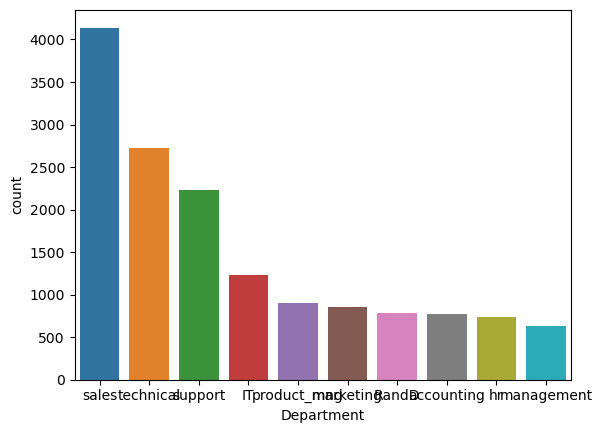

In [78]:
!pip install seaborn

import seaborn as sns

sns.countplot(x = 'Department', data=dataset, order = dataset['Department'].value_counts().index)


C:\Users\sanal\AppData\Local\Temp\ipykernel_7340\2310002600.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x='Department',y='satisfaction_level',ci=None)


<Axes: xlabel='Department', ylabel='satisfaction_level'>

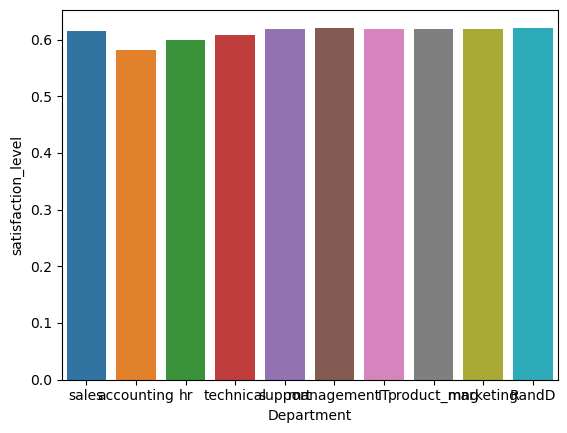

In [79]:
sns.barplot(data=dataset, x='Department',y='satisfaction_level',ci=None)

<Axes: xlabel='number_project', ylabel='count'>

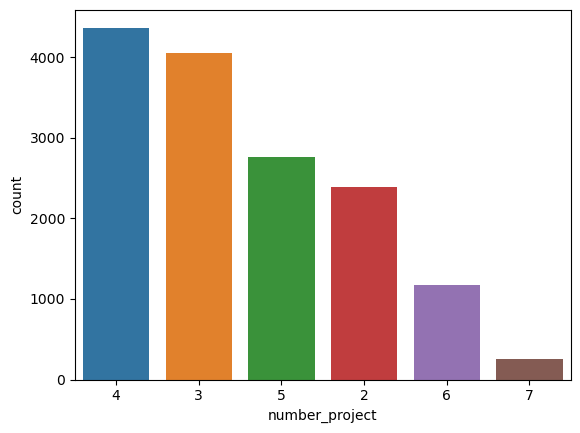

In [80]:
sns.countplot(x = 'number_project', data=dataset, order = dataset['number_project'].value_counts().index)

## Data Engineering

In [81]:
dataset['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [82]:
dataset['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [83]:
dataset['satisfaction_level'].unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

In [84]:
dataset['satisfaction_level'] = pd.cut(dataset['satisfaction_level'], bins=[0, 0.5, 0.7, 1.0], 
                                     labels=['Not Satisfied', 'Moderate', 'Satisfied'], 
                                     include_lowest=True)

In [85]:
dataset['satisfaction_level'].unique()

['Not Satisfied', 'Satisfied', 'Moderate']
Categories (3, object): ['Not Satisfied' < 'Moderate' < 'Satisfied']

In [86]:
dataset.groupby('satisfaction_level').size()

satisfaction_level
Not Satisfied    4812
Moderate         3889
Satisfied        6298
dtype: int64

In [87]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
ds_low = dataset[(dataset['satisfaction_level']=="Not Satisfied")] 
ds_average = dataset[(dataset['satisfaction_level']=="Moderate")] 
ds_high = dataset[(dataset['satisfaction_level']=="Satisfied")]
# upsample minority class
ds_average_upsampled = resample(ds_average, 
                                 replace=True,    # sample with replacement
                                 n_samples= 6298, # to match majority class
                                 random_state=42)  # reproducible results
ds_low_upsampled = resample(ds_low, 
                                 replace=True,    # sample with replacement
                                 n_samples= 6298, # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
dataset = pd.concat([ds_average_upsampled,ds_low_upsampled, ds_high])

In [88]:
dataset.groupby('satisfaction_level').size()

satisfaction_level
Not Satisfied    6298
Moderate         6298
Satisfied        6298
dtype: int64

In [89]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder() 
  

col_encode = ['Department','salary','satisfaction_level']
for col in col_encode:
    dataset[col] = label_encoder.fit_transform(dataset[col])

In [90]:
dataset.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,satisfaction_level
11442,0.81,4,189,3,0,0,7,2,0
13144,0.97,3,274,4,1,1,7,2,0
4414,0.71,3,177,3,1,0,0,1,0
5742,0.86,5,222,3,0,0,7,2,0
5227,0.65,3,181,2,0,0,9,0,0


In [91]:
scaled_ds = dataset[['last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','Department','salary','satisfaction_level']]

In [92]:
scaler=StandardScaler()
scaled_features = scaler.fit_transform(scaled_ds)

In [93]:
scaled_ds

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,satisfaction_level
11442,0.81,4,189,3,0,0,7,2,0
13144,0.97,3,274,4,1,1,7,2,0
4414,0.71,3,177,3,1,0,0,1,0
5742,0.86,5,222,3,0,0,7,2,0
5227,0.65,3,181,2,0,0,9,0,0
...,...,...,...,...,...,...,...,...,...
14985,0.99,5,254,5,0,0,9,2,2
14986,0.85,4,247,6,0,0,9,1,2
14987,0.70,5,206,4,0,0,9,1,2
14990,0.88,5,228,5,1,0,8,1,2


## Data modeling and Evaluation

In [94]:
x = dataset.iloc[:,0:8].values
y = dataset.iloc[:,8].values

In [95]:
x

array([[  0.81,   4.  , 189.  , ...,   0.  ,   7.  ,   2.  ],
       [  0.97,   3.  , 274.  , ...,   1.  ,   7.  ,   2.  ],
       [  0.71,   3.  , 177.  , ...,   0.  ,   0.  ,   1.  ],
       ...,
       [  0.7 ,   5.  , 206.  , ...,   0.  ,   9.  ,   1.  ],
       [  0.88,   5.  , 228.  , ...,   0.  ,   8.  ,   1.  ],
       [  0.83,   6.  , 293.  , ...,   0.  ,   8.  ,   1.  ]])

In [96]:
y

array([0, 0, 0, ..., 2, 2, 2])

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [98]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (13225, 8)
y_train:  (13225,)
x_test:  (5669, 8)
y_test:  (5669,)


## Logistic Regression

In [99]:

model_lr = LogisticRegression(max_iter = 200)

In [100]:
model_lr.fit(x_train, y_train)

C:\Users\sanal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [101]:
y_pred_lr = model_lr.predict(x_test)

In [102]:
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.4357029458458282


## Decision Tree Classifier

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
model_dt = DecisionTreeClassifier()

In [105]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [106]:
y_pred_dt = model_dt.predict(x_test)

In [107]:
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

Accuracy :  0.7855000881989769


In [108]:
import sklearn
print(sklearn.__version__)


1.3.2


## Grid Search CV

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7]
}

# Create a Decision Tree Classifier
model = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)  # You can adjust the number of CV folds (cv) as needed

# Fit the GridSearchCV object on your training data
grid_search.fit(x_train, y_train)  # Replace x_train and y_train with your actual training data and labels

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_features': 0.5}
Best Score: 0.7647637051039698


In [110]:
model =  DecisionTreeClassifier(max_features = 0.7)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, predictions))

Accuracy :  0.790792026812489


In [111]:
clf = DecisionTreeClassifier()

In [112]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [113]:
y_pred = clf.predict(x_test)

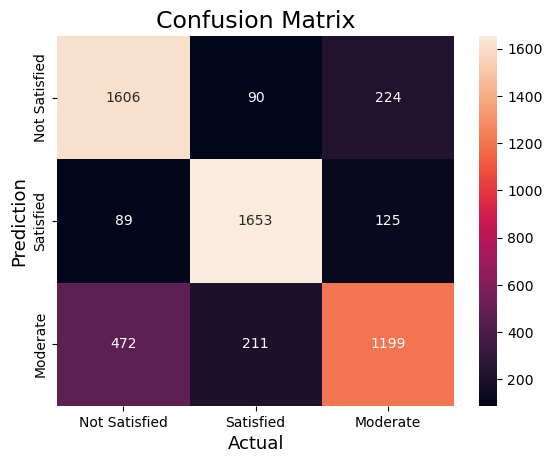

In [114]:
from sklearn import metrics
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Not Satisfied', 'Satisfied', 'Moderate'],
            yticklabels=['Not Satisfied', 'Satisfied', 'Moderate'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## Prediction

In [115]:

Xnew = [[0.99, 5, 254, 5, 0, 0, 9, 2]]  

ynew = model.predict(Xnew)

print(ynew)


[2]


## Saving Model

In [116]:
import pickle
filename ='model.sav'
pickle.dump(clf,open(r'\Users\sanal\Desktop\satisfaction\model.sav', 'wb'))

In [117]:
load_model=pickle.load(open(r"C:\Users\sanal\Desktop\satisfaction\model.sav",'rb'))

In [118]:
model.predict([[0.99, 5, 254, 5, 0, 0, 9, 2]])

array([2])